# Clustering of Iris Data

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or dissimilarity
measure (such as the Euclidean distance).

Let's re-use the results of the 2D PCA of the iris dataset in order to
explore clustering.  First we need to repeat some of the code from the
previous notebook

In [1]:
# make sure ipython inline mode is activated
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# all of this is taken from the notebook '03_iris_dimensionality.ipynb' 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster
centers such that the distance from each point to its cluster is
minimizied.

In [3]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(42)

kmeans = KMeans(n_clusters=3, random_state=rng).fit(X_pca)

In [4]:
import numpy as np
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.02, -0.71],
       [ 0.33,  0.89],
       [-1.29, -0.44]])

In [5]:
kmeans.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
kmeans.labels_[-10:]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

The K-means algorithm has been used to infer cluster labels for the
points.  Let's call the ``plot_2D`` function again, but color the points
based on the cluster labels rather than the iris species.

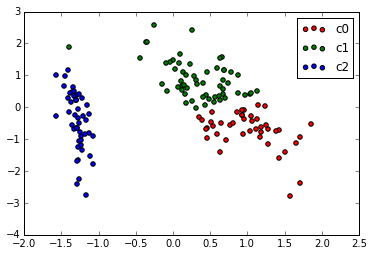

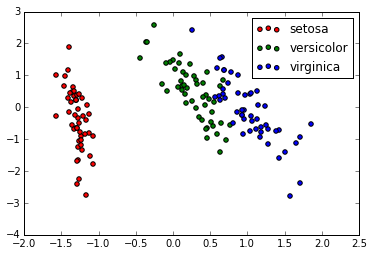

In [7]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

plot_2D(X_pca, iris.target, iris.target_names)

### Exercise

Perform the K-Means cluster search again, but this time learn the
clusters using the full data matrix ``X``, rather than the projected
matrix ``X_pca``.  Does this change the results?  Do these labels
look closer to the true labels?

The K-Means algorithm depends on the random initial placements of the first centroids. In the example you'll always obtain the same placement because the random state is fixed with the command rng = RandomState(42).
Repeat a few times the  K-Means cluster search with a true random state and compare the results. Share your thoughts about the results.